## Hackaton Noviembre 2023

---

**Autores:**  

*   Santiago Torres Velásquez
*   Santiago Narváez Toro
*   Mariana Noreña Vásquez
*   Juan José Torres Patiño
*   Sindy Natalia Duque

**Facultad de Ingeniería**

**Universidad de Antioquia**

In [ ]:
 # Importar librerías

import os
import random

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import seaborn as sns
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn import utils
from scipy.stats import norm, skew

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Cargar el dataframe
df = pd.read_excel('datos.xlsx')
df

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582988,4,10,242,0,0,NO,SI,NO


In [ ]:
df

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582988,4,10,242,0,0,NO,SI,NO


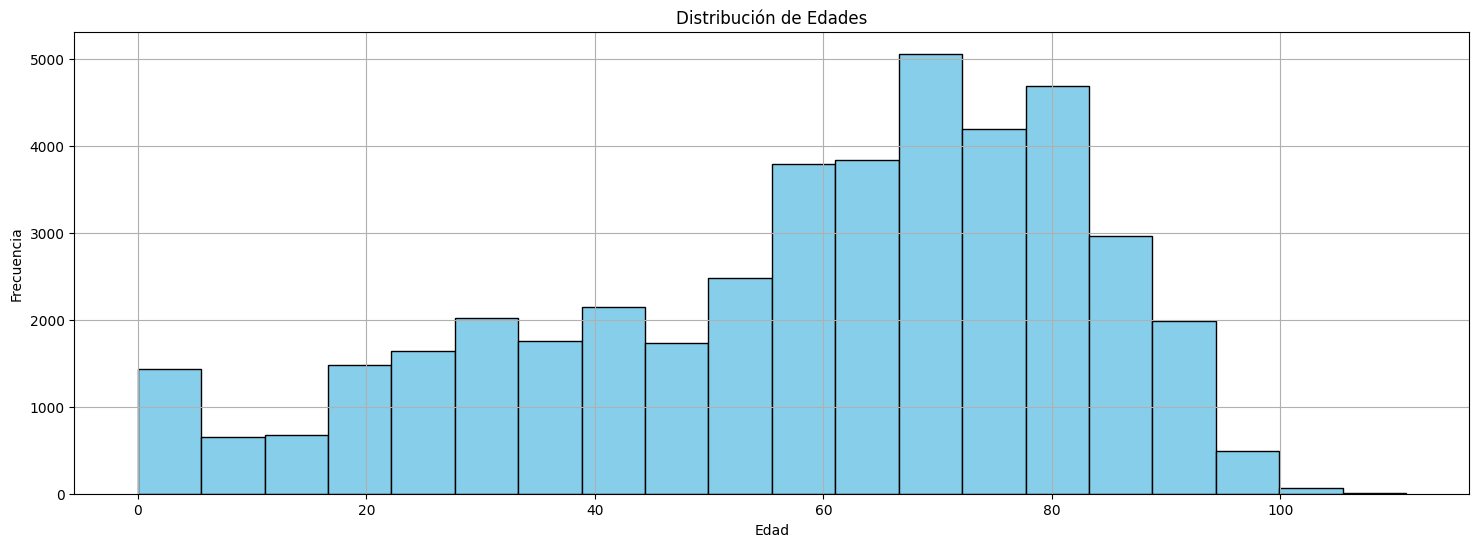

In [ ]:
edades = df['EdadEgreso']

plt.figure(figsize=(18,6))
# Crea un histograma de las edades
plt.hist(edades, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


In [ ]:
promedio_edades = df.groupby('NombreTipoDiagnostico')['EdadEgreso'].mean()
print(promedio_edades)

NombreTipoDiagnostico
0    56.804680
1    59.868219
2    40.166667
Name: EdadEgreso, dtype: float64


In [ ]:
promedio_edades_por_genero = df.groupby('vGenero')['EdadEgreso'].mean()
print(promedio_edades_por_genero)

vGenero
0    60.584546
1    56.219196
Name: EdadEgreso, dtype: float64


In [ ]:
promedio_edades_por_aseguradora = df.groupby('Aseguradora')['EdadEgreso'].mean()

# Mostrar el resultado
print(promedio_edades_por_aseguradora)

Aseguradora
0     41.000000
1     37.974359
2     55.000000
3     62.982780
4     34.365385
        ...    
69    67.409222
70    58.857143
71    67.000000
72    88.000000
73    23.000000
Name: EdadEgreso, Length: 74, dtype: float64


In [ ]:
promedio_pacientes_por_medico = df.groupby('ID_Medico_registra').size().mean()

# Contar la cantidad de médicos distintos
cantidad_medicos_distintos = df['ID_Medico_registra'].nunique()

# Mostrar el resultado
print(f'Promedio de pacientes por médico: {promedio_pacientes_por_medico:.2f}')
print(f'Cantidad de médicos distintos: {cantidad_medicos_distintos}')


Promedio de pacientes por médico: 73.02
Cantidad de médicos distintos: 591


<ipython-input-9-cdbde5e1e1e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiasEstanciaClinica'] , fit=norm);



 mu = 8.82 and sigma = 10.89



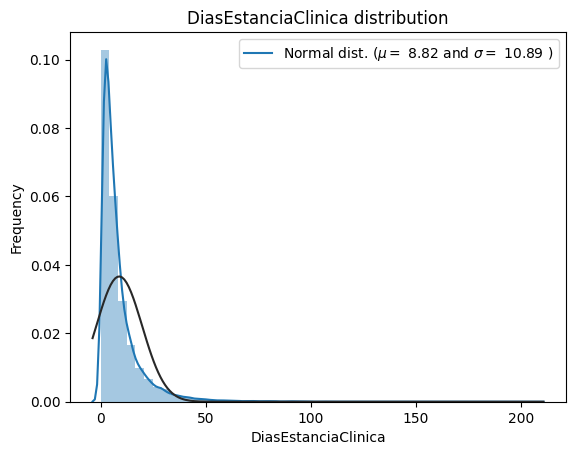

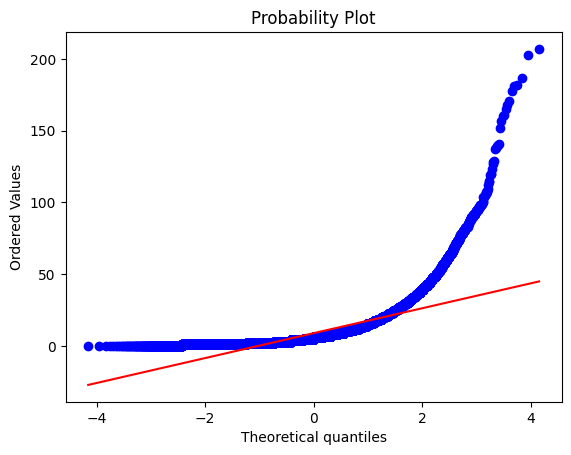

In [ ]:
# Se extrae la distribución de la estancia clínica.
sns.distplot(df['DiasEstanciaClinica'] , fit=norm);

# Extraer parámetros mu y sigma.
(mu, sigma) = norm.fit(df['DiasEstanciaClinica'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotear la distribución.
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('DiasEstanciaClinica distribution')

fig = plt.figure()
res = stats.probplot(df['DiasEstanciaClinica'], plot=plt)
plt.show()

<ipython-input-10-30c7229ac29e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot = True)


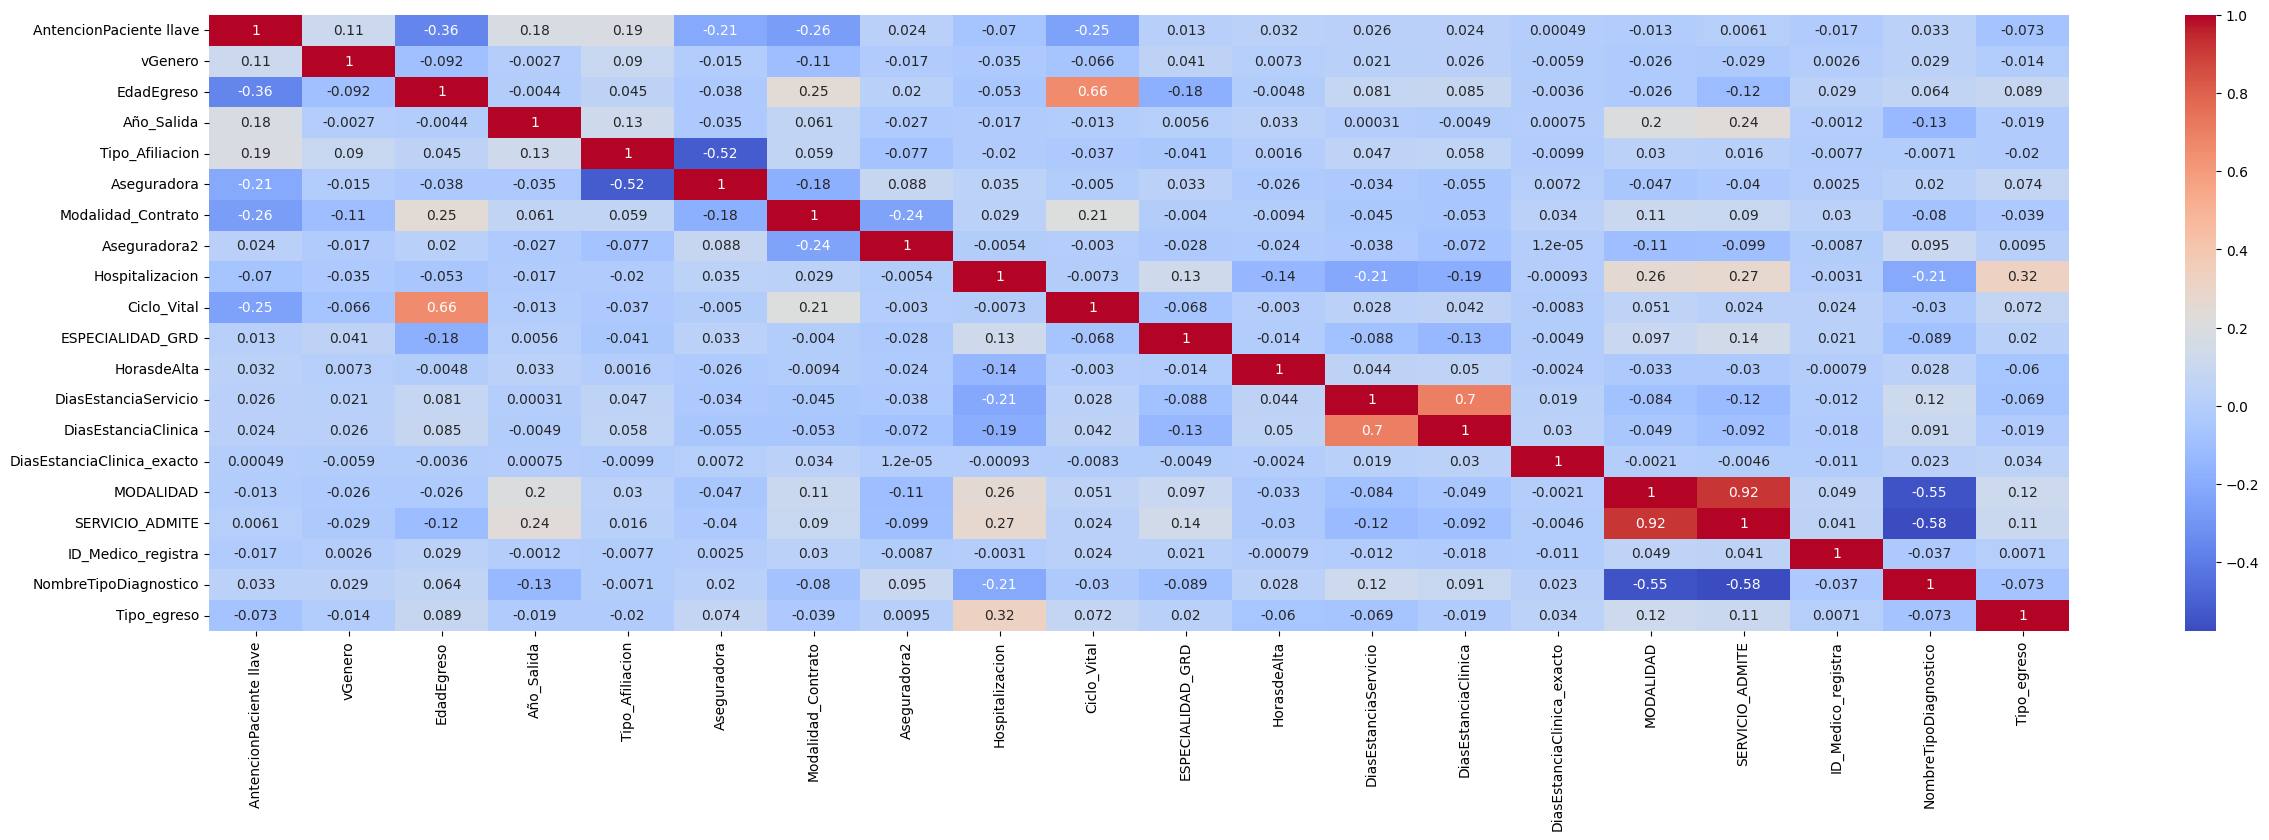

In [ ]:
# Matriz de correlación
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
# Para un treshold específico se extraen las variables que se correlacionen con la estancia clinica.
corr = df.corr()
corr[corr['DiasEstanciaClinica']>0.02].index

<ipython-input-11-7b3d08b24c4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Index(['AntencionPaciente llave', 'vGenero', 'EdadEgreso', 'Tipo_Afiliacion',
       'Ciclo_Vital', 'HorasdeAlta', 'DiasEstanciaServicio',
       'DiasEstanciaClinica', 'DiasEstanciaClinica_exacto',
       'NombreTipoDiagnostico'],
      dtype='object')

In [ ]:
# Limitar el data frame a las variables que se correlacionan con la estancia clínica.
data_reduce = df[['vGenero', 'EdadEgreso', 'Tipo_Afiliacion',
       'Ciclo_Vital', 'HorasdeAlta', 'DiasEstanciaServicio',
       'DiasEstanciaClinica', 'DiasEstanciaClinica_exacto',
       'NombreTipoDiagnostico']]

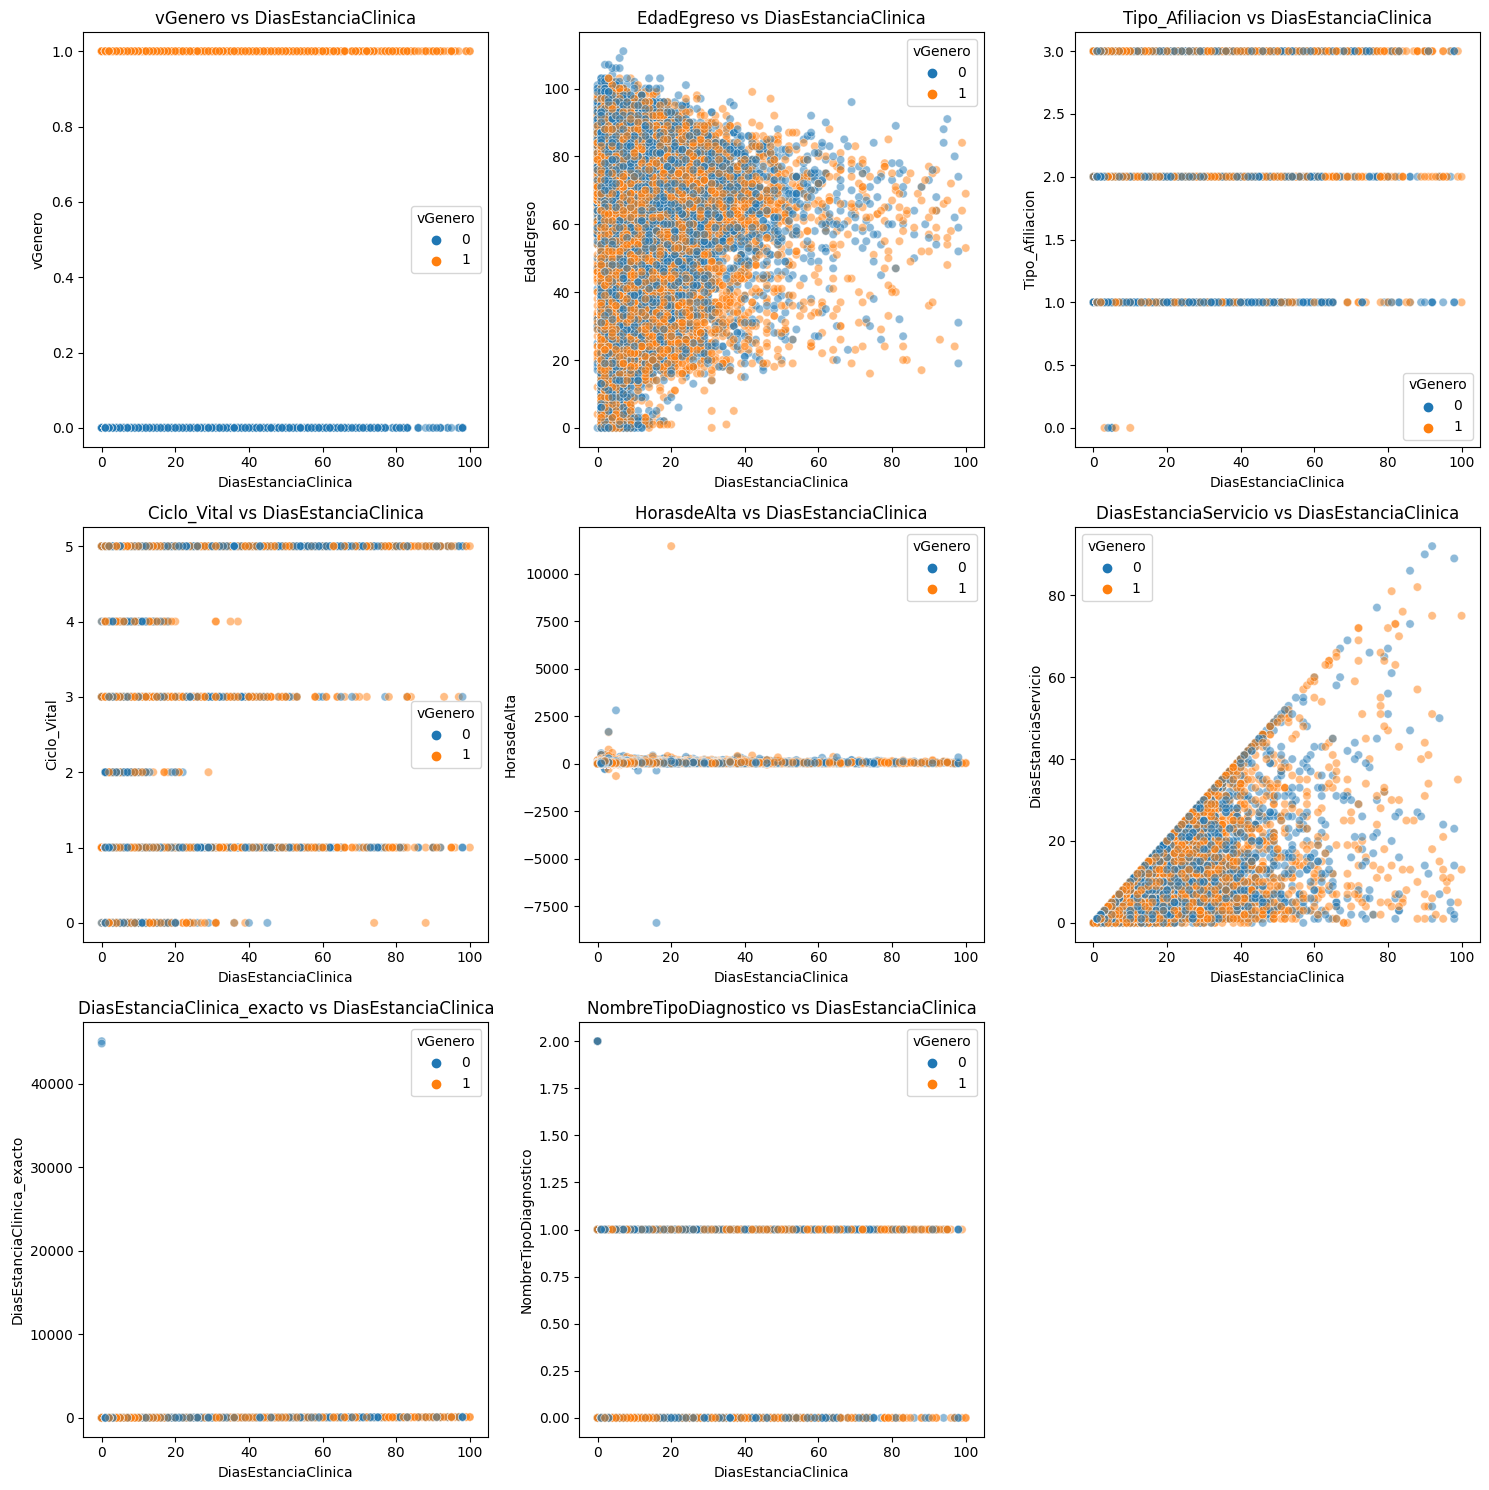

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar las filas donde 'DiasEstanciaClinica' sea mayor a 100 para evitar algunos datos atípicos
data_reduce = df[df['DiasEstanciaClinica'] <= 100][['vGenero', 'EdadEgreso', 'Tipo_Afiliacion',
                  'Ciclo_Vital', 'HorasdeAlta', 'DiasEstanciaServicio',
                  'DiasEstanciaClinica', 'DiasEstanciaClinica_exacto',
                  'NombreTipoDiagnostico']]

num_subplots = data_reduce.shape[1] - 1  # Excluir 'DiasEstanciaClinica'

plt.figure(figsize=(15, 15))

subplot_titles = data_reduce.columns.tolist()
subplot_titles.remove('DiasEstanciaClinica')

# Iterar sobre las variables y crear los subplots
for i, feature in enumerate(subplot_titles):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=data_reduce, x='DiasEstanciaClinica', y=feature, hue='vGenero', alpha=0.5)
    plt.title(f'{feature} vs DiasEstanciaClinica')
    plt.xlabel('DiasEstanciaClinica')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


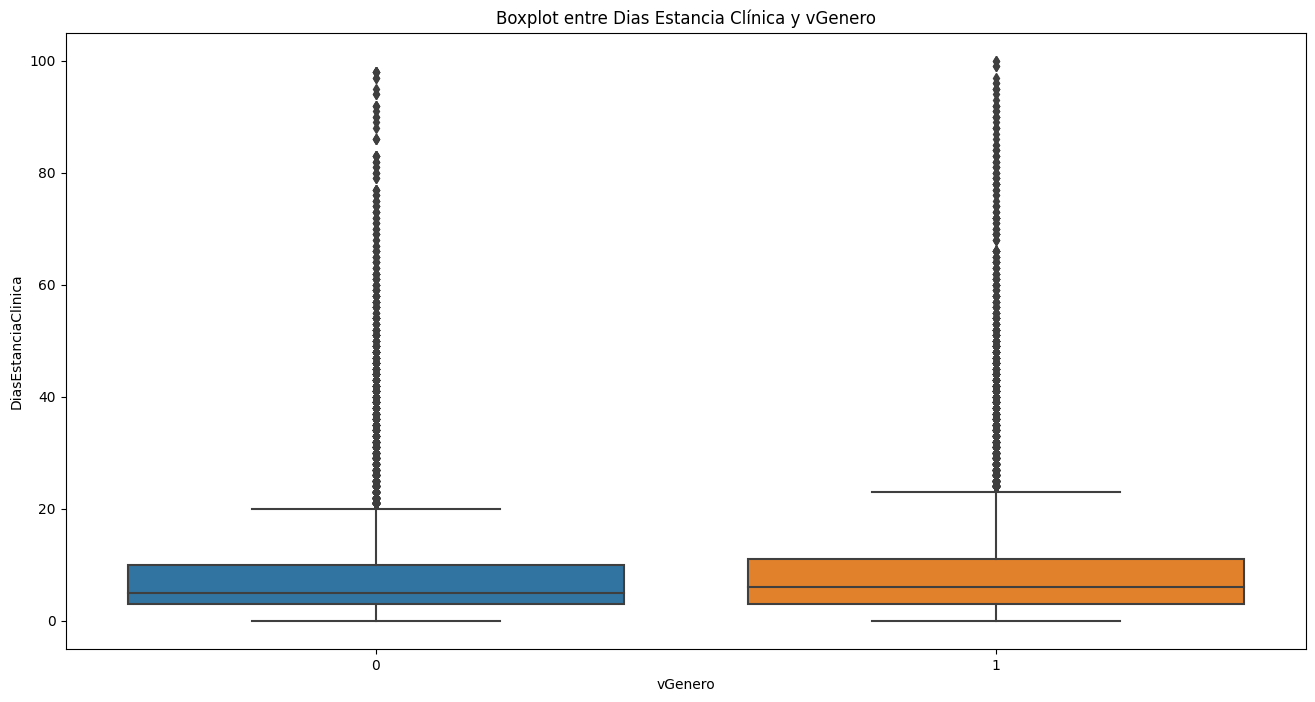

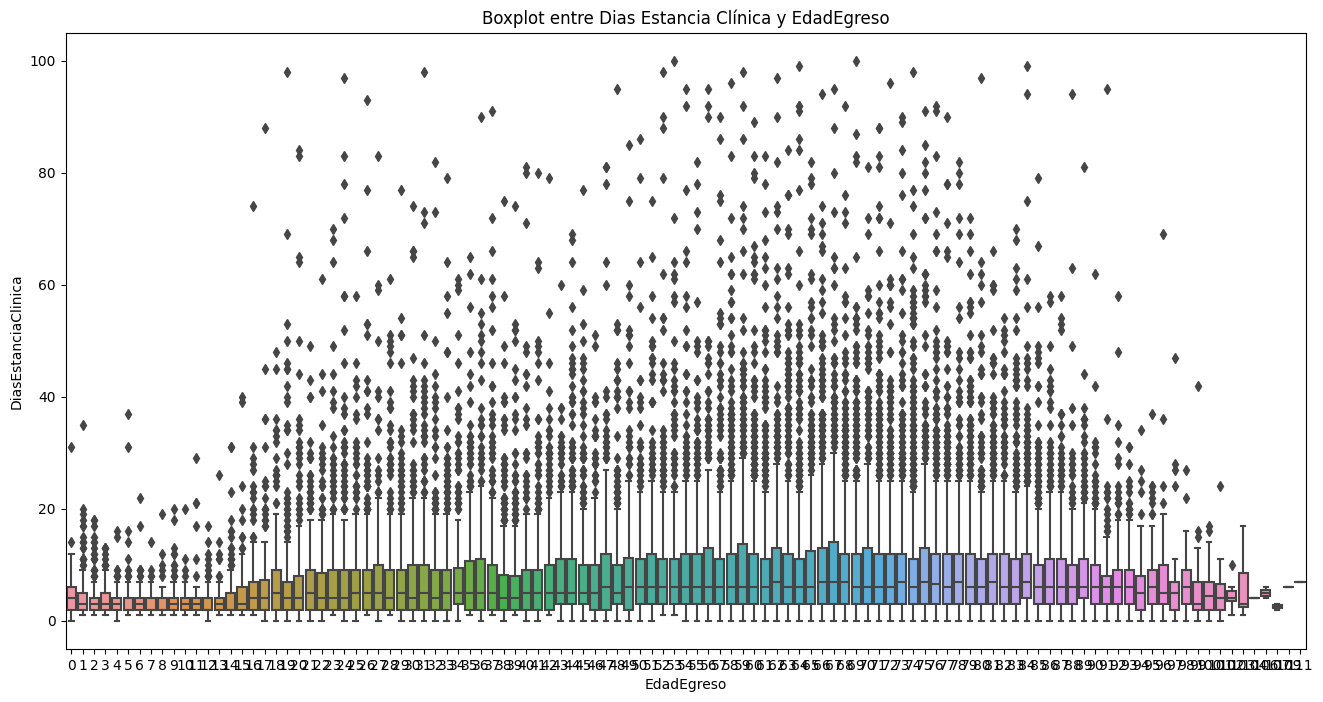

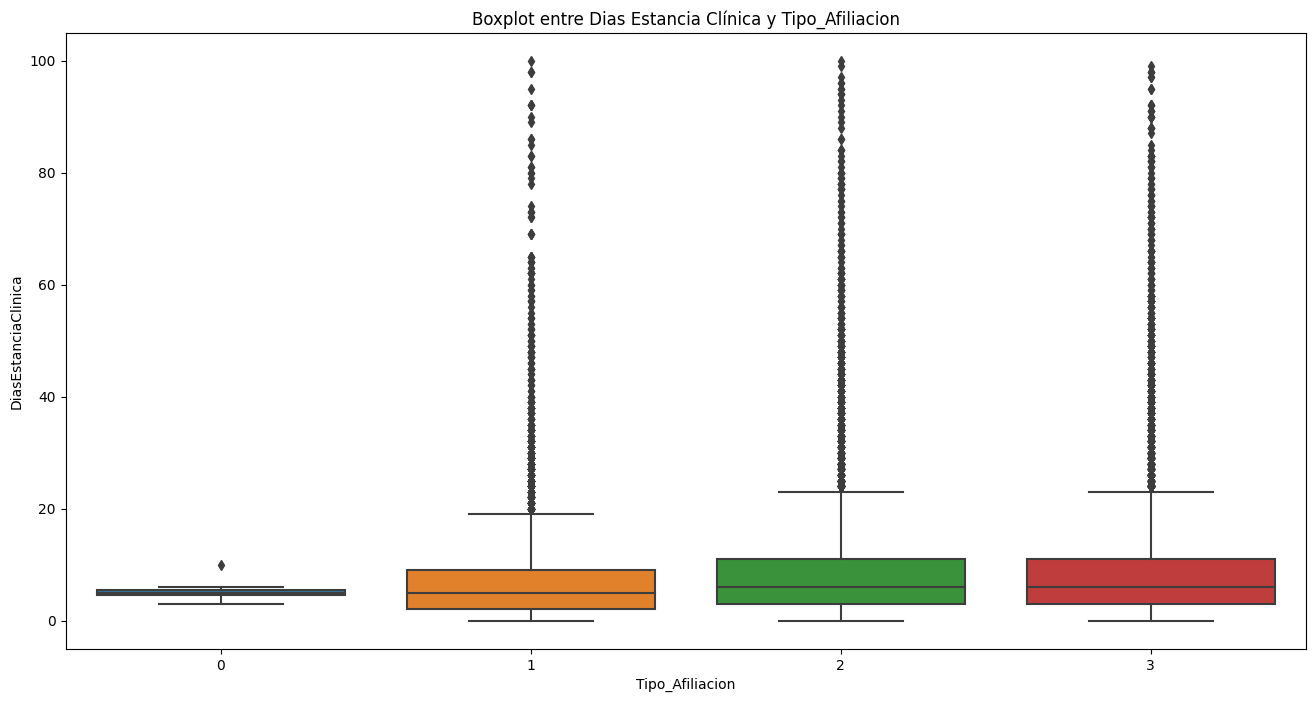

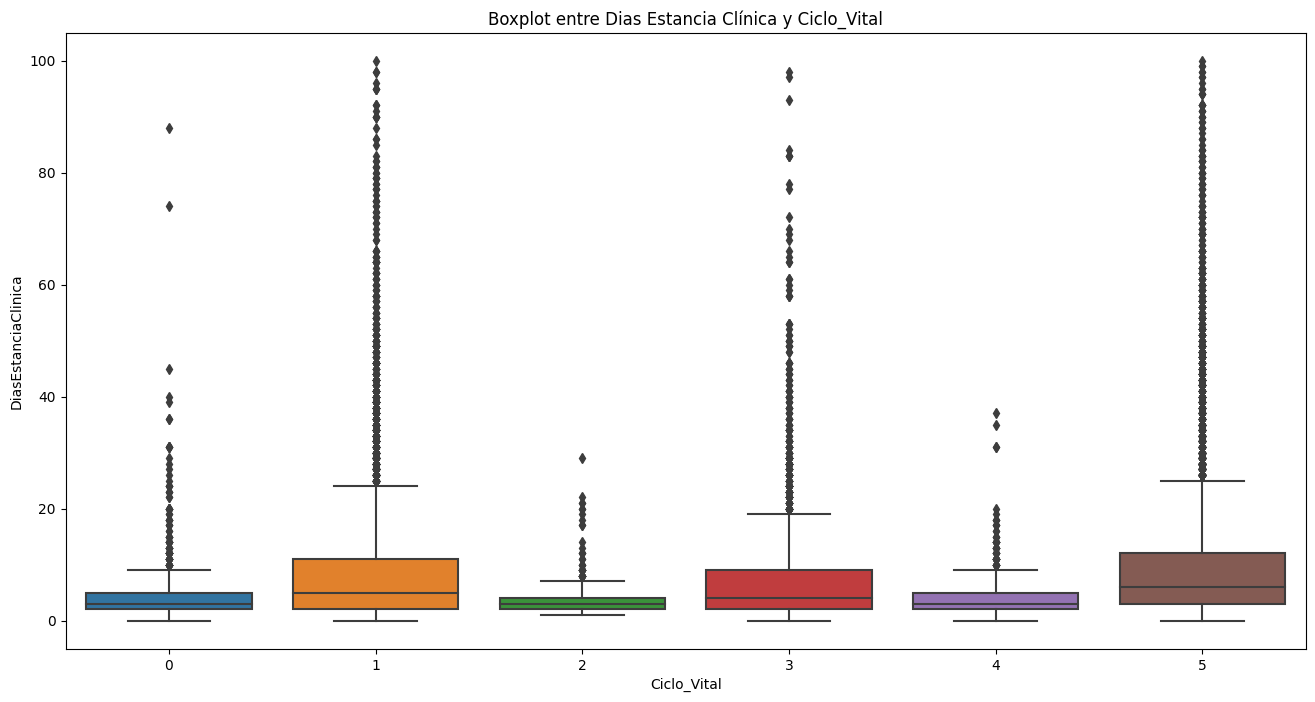

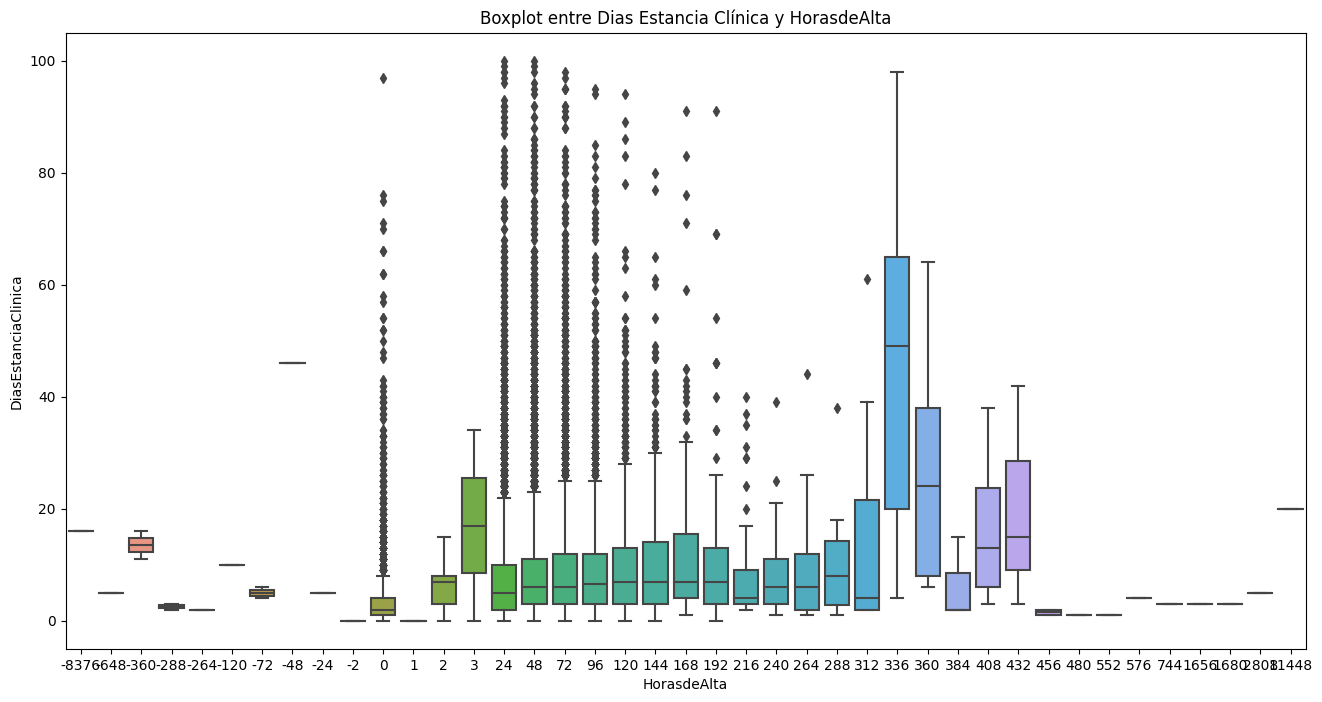

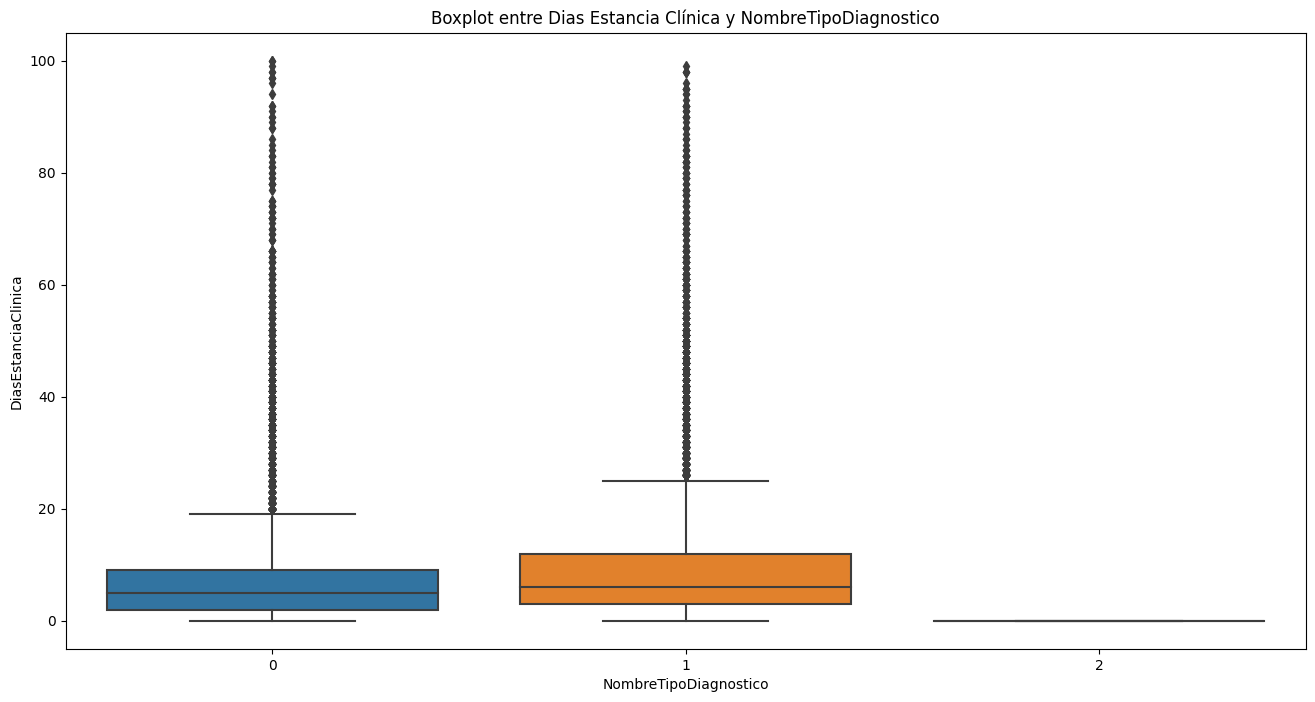

In [ ]:
# Variables para las boxplot.
variables = ['vGenero', 'EdadEgreso', 'Tipo_Afiliacion',
                  'Ciclo_Vital', 'HorasdeAlta',
                  'NombreTipoDiagnostico']

# Ciclo para recorrer las variables y crear los boxplot.
for i,k in enumerate (variables):
  plt.figure(figsize=(16,8))
  plt.title("Boxplot entre Dias Estancia Clínica y {}".format(k))
  sns.boxplot(x=k , y='DiasEstanciaClinica', data=data_reduce)
  plt.show()
  print("\n")

MODELO DE REGRESION LINEAL

In [ ]:
# Dividir los datos como 70 - 30.
X_train, X_test, y_train, y_test = train_test_split(data_reduce.drop('DiasEstanciaClinica', axis=1), data_reduce['DiasEstanciaClinica'], test_size=0.3, random_state=101)

In [ ]:
# Normalizar datos
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)
#y_train = sc_X.fit_transform(y_train)
#y_test = sc_y.fit_transform(y_test)

In [ ]:
# Cargar un modelo de regresion lineal.
lm = LinearRegression()

# Adapta el modelo a estos datos de entrenamiento.
lm.fit(X_train,y_train)

LinearRegression()

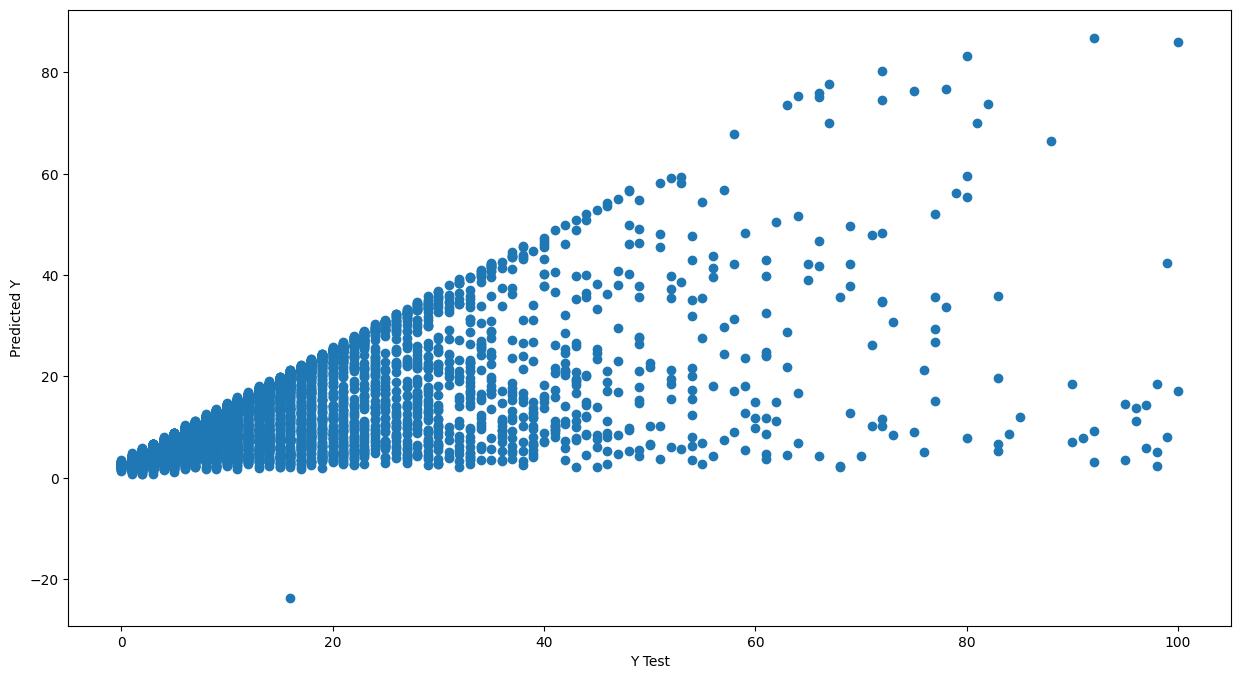

In [ ]:
# Se hacen las predicciones de los datos de test.
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

# Se grafica las predicciones.
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

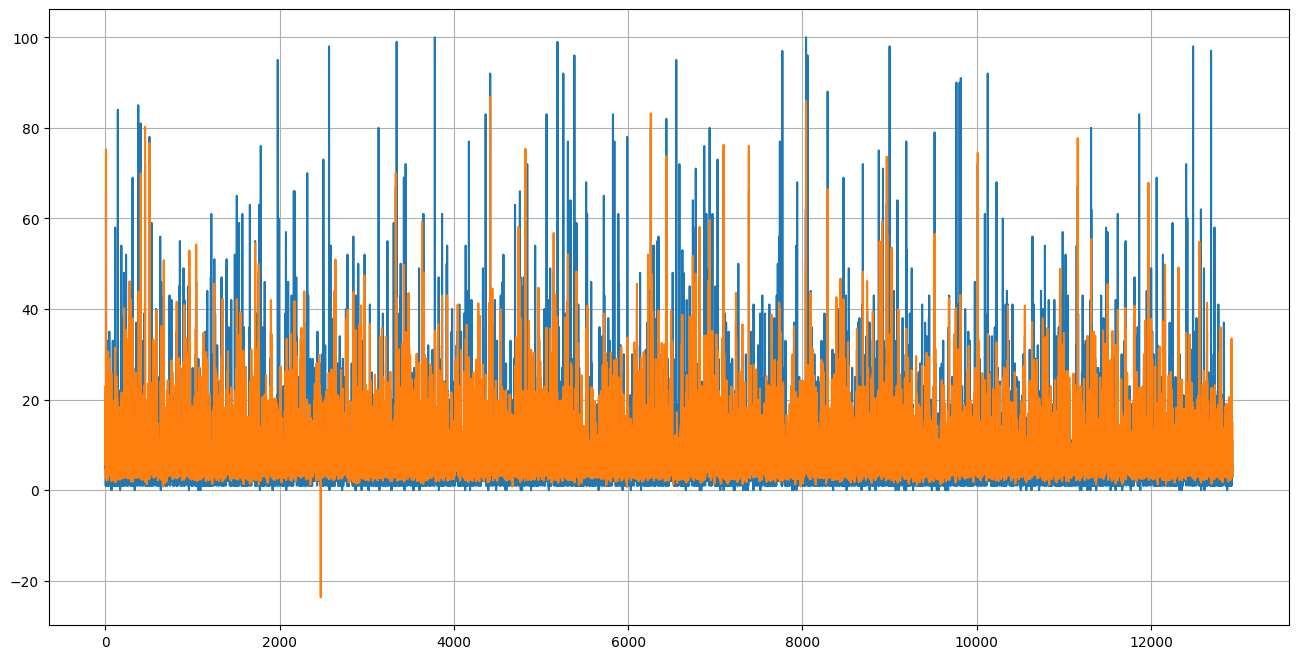

In [ ]:
# Gráfica de datos
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.grid()
plt.show()

In [ ]:
# Cálculo de las métricas de desempeño

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE: 3.8383125428004927
MSE: 54.913183478886275
RMSE: 7.410343006830809
R2:  0.4933217789728841


In [ ]:
from sklearn import linear_model

clf = linear_model.BayesianRidge(tol=0.1, alpha_init=1, lambda_init=1)

clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_init=1, lambda_init=1, tol=0.1)

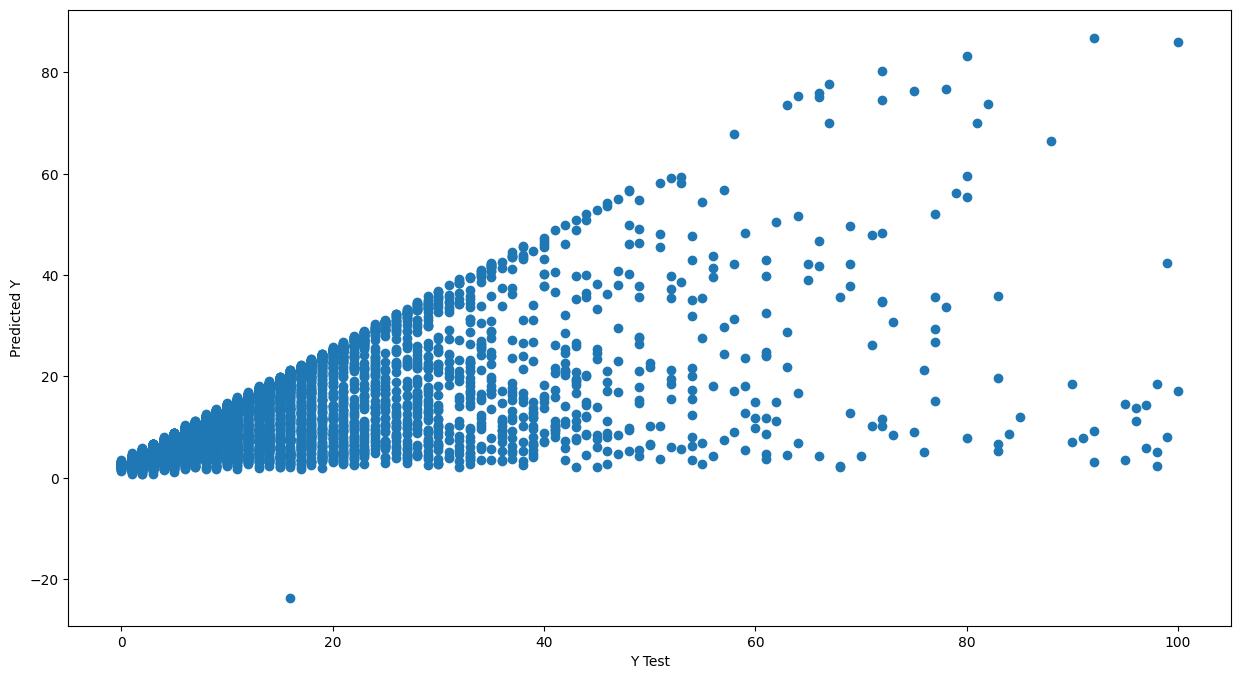

In [ ]:
# Se hacen las predicciones de los datos de test.
predictionsclf = clf.predict(X_test)
predictionsclf = predictions.reshape(-1,1)

# Se grafica las predicciones.
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

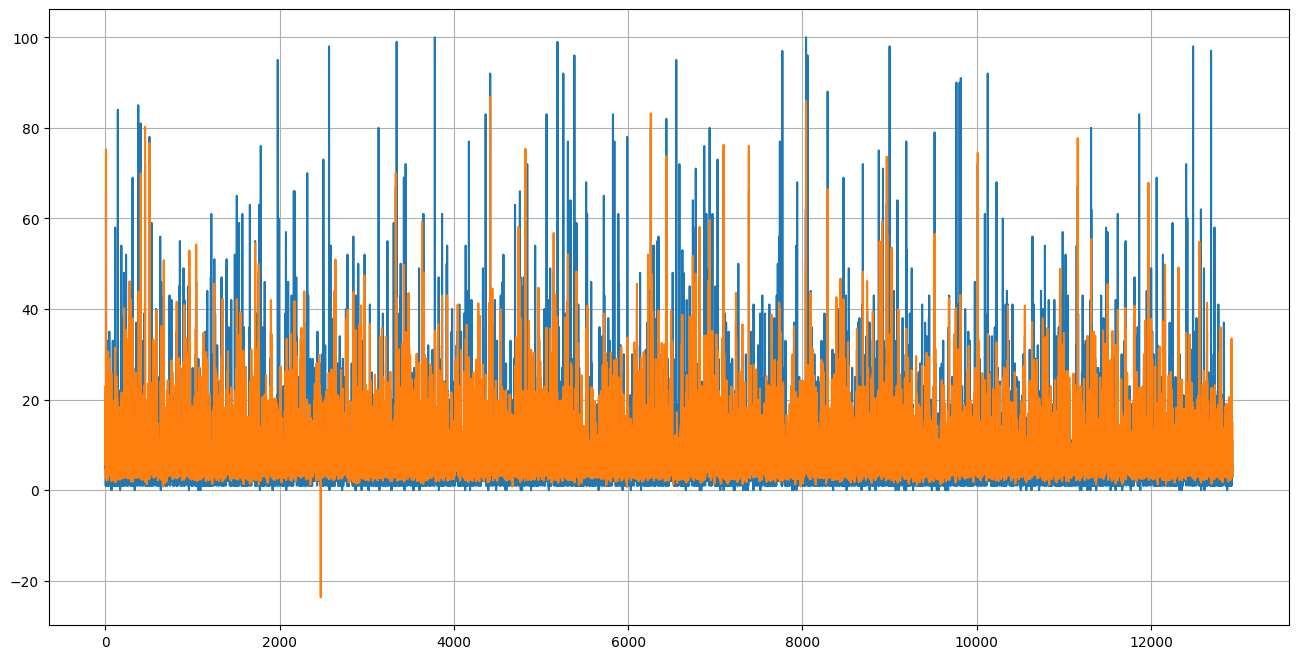

In [ ]:
# Gráfica de datos
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictionsclf, label = 'predict')
plt.grid()
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictionsclf))
print('MSE:', metrics.mean_squared_error(y_test, predictionsclf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsclf)))
print('R2: ', metrics.r2_score(y_test, predictionsclf))

MAE: 3.8383125428004927
MSE: 54.913183478886275
RMSE: 7.410343006830809
R2:  0.4933217789728841
